<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning
*16 de Noviembre de 2024*

#### Integrantes: 
` Gabriel Álvarez, Giuseppe Lavarello, Ingrid Solís, Rosario Valderrama `

## 1. Objetivo

El objetivo de este informe es realizar un análisis del conjunto de datos de **Indicadores de Salud de Diabetes** del **CDC** para:

1. Determinar los factores que contribuyen principalmente al diagnóstico de diabetes.

2. Aplicar modelo de NNet feedFordward que permita predecir el diagnóstico (clasiicación) de diabetes.


## 2. Introducción
<div style="text-align: justify;">
La diabetes es una de las principales preocupaciones de salud a nivel mundial, afectando a millones de personas y contribuyendo significativamente a la mortalidad global. Esta enfermedad crónica ocurre cuando el cuerpo no produce suficiente insulina o no puede utilizarla de manera eficiente, lo que resulta en niveles elevados de glucosa en sangre. Si no se trata adecuadamente, la diabetes puede llevar a complicaciones graves, como enfermedades cardíacas, accidentes cerebrovasculares, insuficiencia renal, entre otras.
<br><br>  
El objetivo de este informe es analizar este conjunto de datos para identificar patrones o relaciones entre las variables que puedan predecir el diagnóstico de diabetes. Para ello, se aplicarán tanto modelos de aprendizaje no supervisado como supervisado.
</div>

## 3. Metodología

La metodología a utilizar seguirá una estructura general de varias etapas que incluyen la preparación de los datos, el análisis exploratorio, el desarrollo de modelos y la evaluación de resultados.

1. **Preparación de los Datos**

2. **Análisis Exploratorio de Datos (EDA)**

3. **Limpieza de Datos**

4. **Desarrollo de Modelo**:
   
5. **Evaluación de Resultados**:

Métricas de Evaluación

Interpretación de Resultados

6. **Conclusiones y Recomendaciones**

### 3.1  Preparación de los Datos
#### 3.1.1  Importe de paquetes

In [29]:
# %pip install ucimlrepo
# %pip install xgboost
# %pip install --upgrade scikit-learn
# %pip install --upgrade imbalanced-learn
# %pip install hyperopt
# %pip install missingno
# %pip install tensorflow

In [ ]:
# Importar paquetes
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo 
import missingno as msng

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from keras import models, layers, optimizers, activations
import numpy as np
import random
import tensorflow as tf

from imblearn.over_sampling import SMOTE

# setear opciones
sns.set_theme()
pd.set_option('display.max_columns', None)

#### 3.1.2  Carga de Datos

In [3]:
# Buscar dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (como pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# informacion de variables 
print(cdc_diabetes_health_indicators.variables) 

                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             

##### Información de Variables


| **Nombre de Variable**     | **Rol**    | **Tipo**   | **Descripción**                                                          | **Unidades**       | **Valores Faltantes** |
|----------------------------|------------|------------|-------------------------------------------------------------------------|---------------------|---------------------|
| ID                         | ID         | Integer   | ID del paciente                                                                |                     | no                  |
| Diabetes_binary            | Target     | Binary    | 0 = sin diabetes, 1 = prediabetes o diabetes                                 |                     | no                  |
| HighBP                     | Feature    | Binary    | 0 = sin presión arterial alta, 1 = presión arterial alta                      |                     | no                  |
| HighChol                   | Feature    | Binary    | 0 = sin colesterol alto, 1 = colesterol alto                                   |                     | no                  |
| CholCheck                  | Feature    | Binary    | 0 = sin chequeo de colesterol en 5 años, 1 = sí chequeo de colesterol en 5 años |                     | no                  |
| BMI                        | Feature    | Integer   | Índice de Masa Corporal                                                         |                     | no                  |
| Smoker                     | Feature    | Binary    | 0 = no, 1 = sí (ha fumado al menos 100 cigarrillos en su vida)              |                     | no                  |
| Fruits                     | Feature    | Binary    | 0 = no, 1 = sí (consume fruta 1 o más veces al día)                          |                     | no                  |
| Veggies                    | Feature    | Binary    | 0 = no, 1 = sí (consume verduras 1 o más veces al día)                       |                     | no                  |
| HvyAlcoholConsump          | Feature    | Binary    | 0 = no, 1 = sí (consumo excesivo de alcohol)                                 |                     | no                  |
| AnyHealthcare              | Feature    | Binary    | 0 = no, 1 = sí (tiene algún tipo de cobertura de salud)                      |                     | no                  |
| NoDocbcCost               | Feature    | Binary    | 0 = no, 1 = sí (necesitó ver a un médico pero no pudo debido a costos)      |                     | no                  |
| GenHlth                   | Feature    | Integer   | Escala de salud general 1-5 (1 = excelente, 5 = mala)                        |                     | no                  |
| MentHlth                  | Feature    | Integer   | Días de mala salud mental en los últimos 30 días (escala 1-30)               | días                | no                  |
| PhysHlth                  | Feature    | Integer   | Días de mala salud física en los últimos 30 días (escala 1-30)               | días                | no                  |
| DiffWalk                   | Feature    | Binary    | 0 = no, 1 = sí (dificultad seria para caminar o subir escaleras)            |                     | no                  |
| Sex                        | Feature    | Binary    | 0 = mujer, 1 = hombre                                                          |                     | no                  |
| Stroke                     | Feature    | Binary    | 0 = no, 1 = sí (alguna vez le dijeron que tuvo un accidente cerebrovascular) |                     | no                  |
| HeartDiseaseorAttack       | Feature    | Binary    | 0 = no, 1 = sí (enfermedad cardíaca coronaria o infarto de miocardio)       |                     | no                  |
| PhysActivity               | Feature    | Binary    | 0 = no, 1 = sí (actividad física en los últimos 30 días, excluyendo el trabajo) |                     | no                  |

##### Dataset Metadata
| **Attribute**                    | **Value**                                                                                                                                                                                                                                                                                     |
|-----------------------------------|----------------------------------------------------------|
| **uci_id**                        | 891                                                                                                                                                                                                                                                                                           |
| **name**                          | CDC Diabetes Health Indicators                                                                                                                                                                                                                                                                 |
| **repository_url**                | [UCI Repository Link](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)                                                                                                                                                                                                  |
| **data_url**                      | [Data Link](https://archive.ics.uci.edu/static/public/891/data.csv)                                                                                                                                                                                                                            |
| **abstract**                      | The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. |
| **area**                          | Health and Medicine                                                                                                                                                                                                                                                                           |
| **tasks**                         | Classification                                                                                                                                                                                                                                                                                |
| **characteristics**               | Tabular, Multivariate                                                                                                                                                                                                                                                                         |
| **num_instances**                 | 253680                                                                                                                                                                                                                                                                                        |
| **num_features**                  | 21                                                                                                                                                                                                                                                                                            |
| **feature_types**                 | Categorical, Integer                                                                                                                                                                                                                                                                          |
| **demographics**                  | Sex, Age, Education Level, Income                                                                                                                                                                                                                                                             |
| **target_col**                    | Diabetes_binary                                                                                                                                                                                                                                                                               |
| **index_col**                     | ID                                                                                                                                                                                                                                                                                            |
| **has_missing_values**            | no                                                                                                                                                                                                                                                                                            |
| **missing_values_symbol**         | None                                                                                                                                                                                                                                                                                          |
| **year_of_dataset_creation**      | 2017                                                                                                                                                                                                                                                                                          |
| **last_updated**                  | Fri Nov 03 2023                                                                                                                                                                                                                                                                               |
| **dataset_doi**                   | 10.24432/C53919                                                                                                                                                                                                                                                                               |
| **intro_paper ID**                | 308                                                                                                                                                                                                                                                                                           |
| **intro_paper type**              | NATIVE                                                                                                                                                                                                                                                                                        |
| **intro_paper title**             | Incidence of End-Stage Renal Disease Attributed to Diabetes Among Persons with Diagnosed Diabetes — United States and Puerto Rico, 2000–2014                                                                                                                                                   |
| **intro_paper authors**           | Nilka Rios Burrows, MPH; Israel Hora, PhD; Linda S. Geiss, MA; Edward W. Gregg, PhD; Ann Albright, PhD                                                                                                                                                                                         |
| **intro_paper venue**             | Morbidity and Mortality Weekly Report                                                                                                                                                                                                                                                          |
| **intro_paper year**              | 2017                                                                                                                                                                                                                                                                                          |
| **intro_paper URL**               | [Paper Link](https://www.cdc.gov/mmwr/volumes/66/wr/mm6643a2.htm)                                                                                                                                                                                                                             |
| **additional_info summary**       | Dataset link: https://www.cdc.gov/brfss/annual_data/annual_2014.html                                                                                                                                                                                                                           |
| **additional_info purpose**       | To better understand the relationship between lifestyle and diabetes in the US                                                                                                                                                                                                                 |
| **additional_info funded_by**     | The CDC                                                                                                                                                                                                                                                                                       |
| **instances_represent**           | Each row represents a person participating in this study.                                                                                                                                                                                                                                     |
| **recommended_data_splits**       | Cross validation or a fixed train-test split could be used.                                                                                                                                                                                                                                   |
| **sensitive_data**                | - Gender<br/>- Income<br/>- Education level                                                                                                                                                                                                                                                   |
| **preprocessing_description**     | Bucketing of age                                                                                                                                                                                                                                                                              |
| **variable_info**                 | - Diabetes diagnosis<br/>- Demographics (race, sex)<br/>- Personal information (income, educations)<br/>- Health history (drinking, smoking, mental health, physical health)                                                                                                                   |
| **external_url**                  | [Kaggle Dataset Link](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)                                                                                                                                                                                          |


In [4]:
df0=pd.concat([y,X], axis=1)

### 3.2 Análisis Exploratorio

In [5]:
# Mostrar las primeras 10 filas de los datos
df0.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,1,0,1,0,2,0,2,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,0,0,1,0,3,0,14,0,0,9,6,7
7,0,1,1,1,25,1,0,0,1,0,1,0,1,0,3,0,0,1,0,11,4,4
8,1,1,1,1,30,1,0,1,0,1,1,0,1,0,5,30,30,1,0,9,5,1
9,0,0,0,1,24,0,0,0,0,0,1,0,1,0,2,0,0,0,1,8,4,3


El dataset cuenta con 253.680 entradas y con 22 columnas. No existen valores NaN presentes.

In [6]:
# Mostrar el tamaño del DataFrame
df0.shape

(253680, 22)

In [7]:
# Recopilación de información básica sobre el conjunto de datos
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [8]:
# Notar que estan todas las Features consideradas como Int. Se cambia a Bool donde corresponda

binary_features = {
    "Diabetes_binary": bool,
    "HighBP": bool,
    "HighChol": bool,
    "CholCheck": bool,
    "Smoker": bool,
    "Stroke": bool,
    "HeartDiseaseorAttack": bool,
    "PhysActivity": bool,
    "Fruits": bool,
    "Veggies": bool,
    "HvyAlcoholConsump": bool,
    "AnyHealthcare": bool,
    "NoDocbcCost": bool,
    "DiffWalk": bool,
    "Sex": bool,
}
df0 = df0.astype(binary_features)

In [9]:
# Recopilación de estadísticas descriptivas sobre los datos
df0.describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


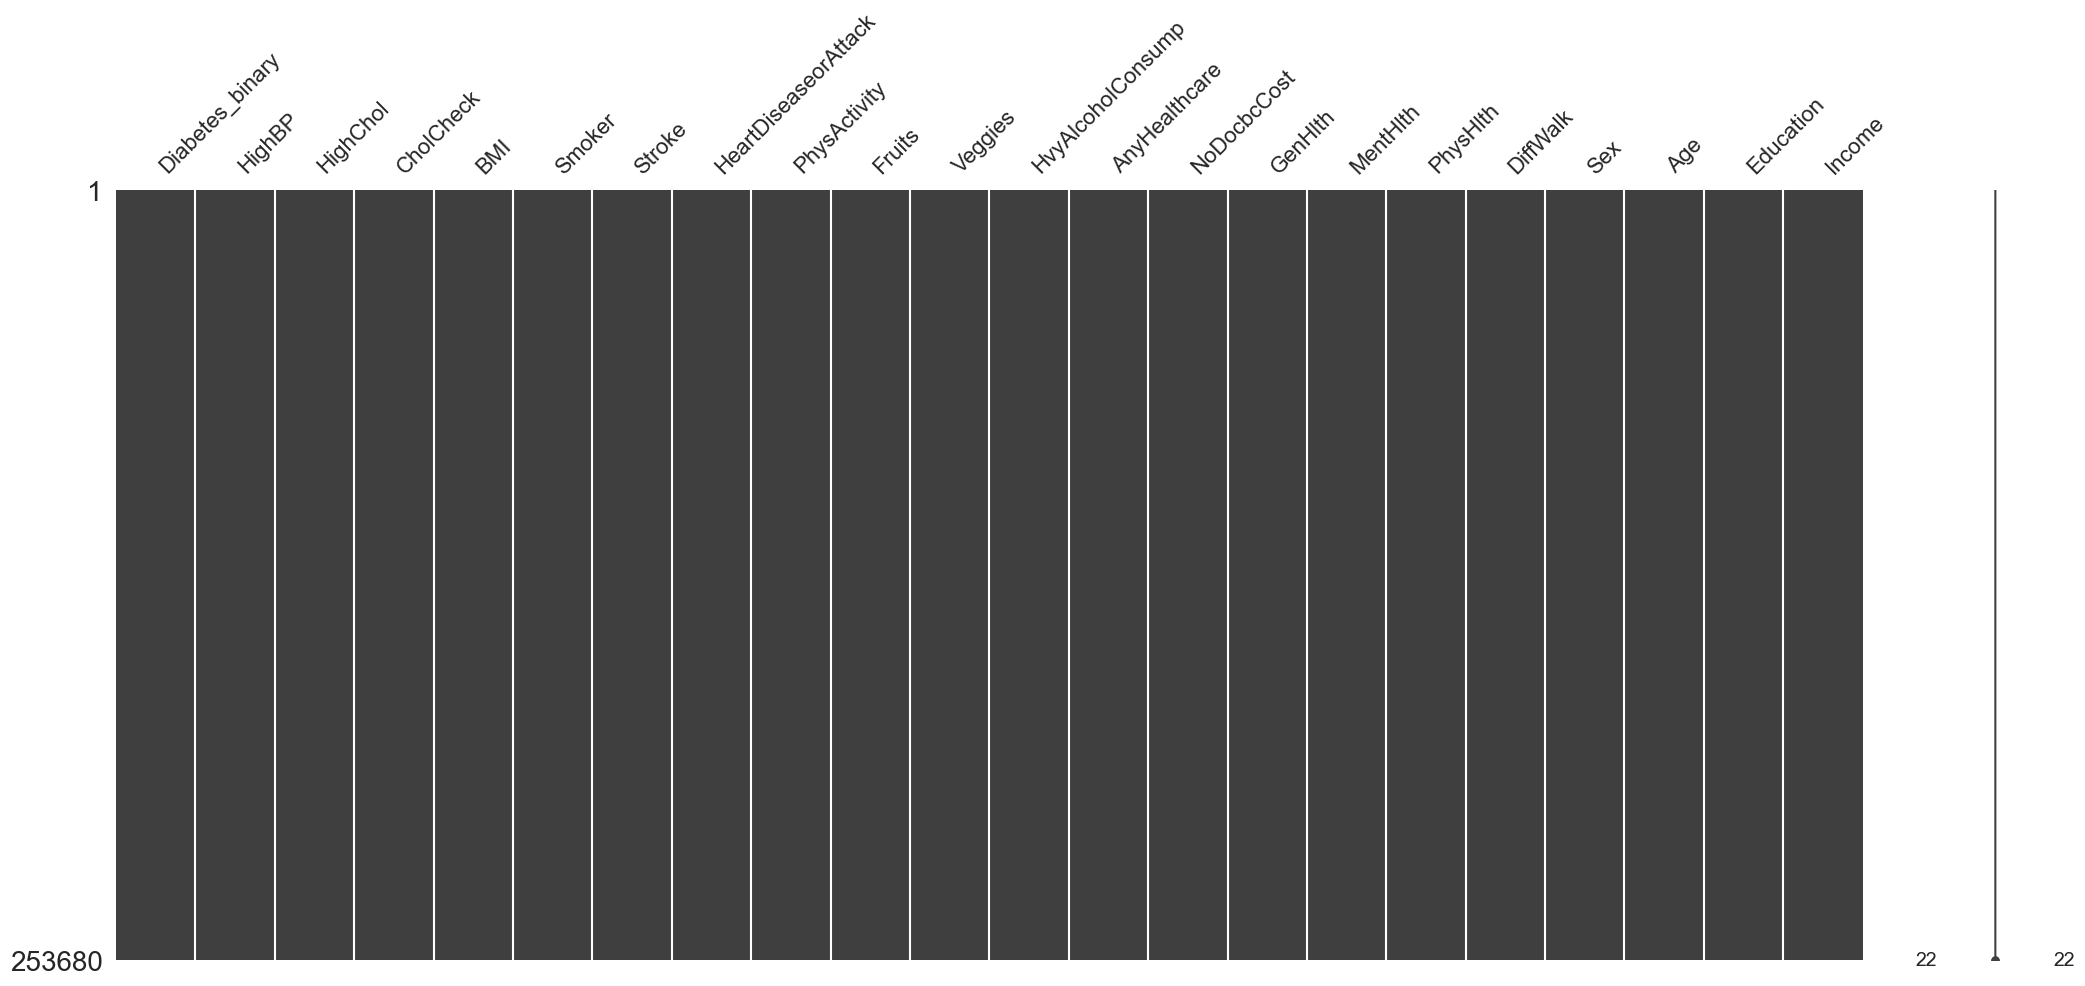

In [10]:
# Chequeo visual de Nans
msng.matrix(df0)
plt.show()

### 3.3 Limpieza de Datos

Se verifica cantidad de datos que se encuentren duplicados en el dataset. Podemos ver la existencia de 24.206.

In [11]:
# Chequeo por duplicados
duplicados = df0.duplicated().sum()

# Porcentaje de duplicados
porcentage = df0.duplicated().sum() / X.shape[0] * 100

print(f'{duplicados} filas contienen duplicados, lo que representa el {porcentage.round(2)}% del total de los datos.')


24206 filas contienen duplicados, lo que representa el 9.54% del total de los datos.


In [12]:
df1=df0 # Originalmente se eliminaron los duplicados aqui, pero se elimino ese paso por el desbalance de clases

Creamos un boxplot y un violin plot para visualizar la distribución de todas las variables numéricas para df1 y así poder ver posibles outliers.

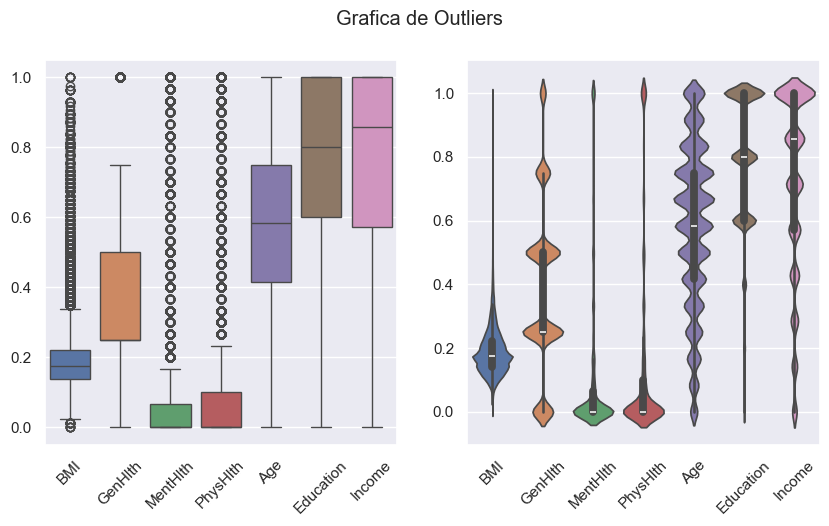

In [13]:
# Crear un boxplot para visualizar la distribución de todas las variables numéricas y detectar posibles valores atípicos
fig, axs= plt.subplots(1, 2, figsize=(10,5))
# seleccionar columnas numéricas
num_columns = df1.select_dtypes(include=['number'])

# normalizar los valores usando escalado Min-Max
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_columns)

# Crear un dataframe con los datos normalizados
df_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)
sns.boxplot(data= df_normalized, ax=axs[0])
sns.violinplot(data= df_normalized, ax=axs[1])

axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)

fig.suptitle('Grafica de Outliers')
plt.show()


`Boxplot:`

**BMI:** La mediana se encuentra cerca de 0.2, con un rango intercuartílico (IQR) que indica una distribución concentrada en valores bajos, y se observa una gran cantidad de outliers distribuidos por encima de 0.4. Esto sugiere que hay individuos con valores de BMI mucho más altos que el promedio.

**GenHlth:** La mediana está alrededor de 0.4, y hay una dispersión notable en la mitad inferior, con algunos outliers por encima de 0.6, indicando una salud general algo diversa en esta muestra.

**MentHlth:** Esta variable tiene una mediana muy baja, cerca de 0, y una gran cantidad de outliers por encima de 0.2, lo que indica que la mayoría de los valores están cerca de cero, pero existen algunos individuos con niveles más altos.

**PhysHlth:** Similar a MentHlth, la mediana está en valores bajos, y la variable tiene muchos outliers, lo que podría indicar problemas físicos ocasionales en una minoría de la muestra.

**Age:** La mediana está cerca de 0.6, con una dispersión más uniforme y un rango amplio, cubriendo casi todo el espectro. No hay muchos outliers, lo que sugiere que esta variable tiene una variabilidad natural mayor.

**Education e Income:** Ambas variables tienen medianas en valores altos, cerca de 0.8 y 0.9, respectivamente, con poca variabilidad. Los datos están concentrados en el extremo superior, sin outliers, lo cual indica que la mayoría de los individuos tienen altos niveles de educación e ingresos.



`Violin Plot:`

**BMI:** Muestra una distribución en forma de campana con mayor densidad en valores bajos (cerca de 0.2), aunque también existen algunos valores en la mitad superior, lo que confirma la presencia de outliers.

**GenHlth:** Presenta una distribución bimodal con picos alrededor de 0.4 y 0.6, sugiriendo que hay dos subgrupos en términos de salud general.

**MentHlth:** La mayoría de los datos están concentrados cerca de 0, pero hay una pequeña distribución en valores superiores, indicando que solo un pequeño grupo reporta problemas significativos de salud mental.

**PhysHlth:** Similar a MentHlth, los valores se concentran cerca de 0, con algunos datos dispersos en valores más altos, lo que refleja una situación similar para la salud física.

**Age:** Tiene una distribución simétrica y alargada, con una densidad uniforme en el centro del rango, lo que sugiere una mayor variedad de edades.

**Education e Income:** Ambas tienen distribuciones muy estrechas, con la mayoría de los datos en valores altos, lo que indica que la muestra está compuesta principalmente por personas con niveles altos en estas variables.


Los gráficos muestran que, antes del tratamiento de outliers, observamos que BMI, MentHlth, y PhysHlth tienen muchos valores extremos, lo que sugiere gran variabilidad en estas variables, mientras que Education e Income están concentradas en valores altos, con poca variabilidad.

In [14]:
# Bucle para recorrer cada columna numérica y detectar y contar valores atípicos
out_cols=['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']
lims = {}
for column in out_cols:
    print(f"Procesando columna: {column}")
    
    # Calcular el valor del percentil 25
    percentil25 = df1[column].quantile(0.25)
    
    # Calcular el valor del percentil 75
    percentil75 = df1[column].quantile(0.75)
    
    # Calcular el rango intercuartil (IQR)
    iqr = percentil75 - percentil25
    
    # Definir los límites superior e inferior para los valores no atípicos
    limite_superior = percentil75 + 1.5 * iqr
    limite_inferior = percentil25 - 1.5 * iqr
    lims[column] = [limite_superior,limite_inferior]
    
    print(f"Límite inferior para {column}:", limite_inferior)
    print(f"Límite superior para {column}:", limite_superior)
    
    # Identificar los valores atípicos en la columna actual
    valores_atípicos = df1[(df1[column] > limite_superior) | (df1[column] < limite_inferior)]
    
    # Contar el número de filas con valores atípicos
    print(f"Número de filas que contienen valores atípicos en {column}: {len(valores_atípicos)}\n")


Procesando columna: BMI
Límite inferior para BMI: 13.5
Límite superior para BMI: 41.5
Número de filas que contienen valores atípicos en BMI: 9847

Procesando columna: GenHlth
Límite inferior para GenHlth: 0.5
Límite superior para GenHlth: 4.5
Número de filas que contienen valores atípicos en GenHlth: 12081

Procesando columna: MentHlth
Límite inferior para MentHlth: -3.0
Límite superior para MentHlth: 5.0
Número de filas que contienen valores atípicos en MentHlth: 36208

Procesando columna: PhysHlth
Límite inferior para PhysHlth: -4.5
Límite superior para PhysHlth: 7.5
Número de filas que contienen valores atípicos en PhysHlth: 40949



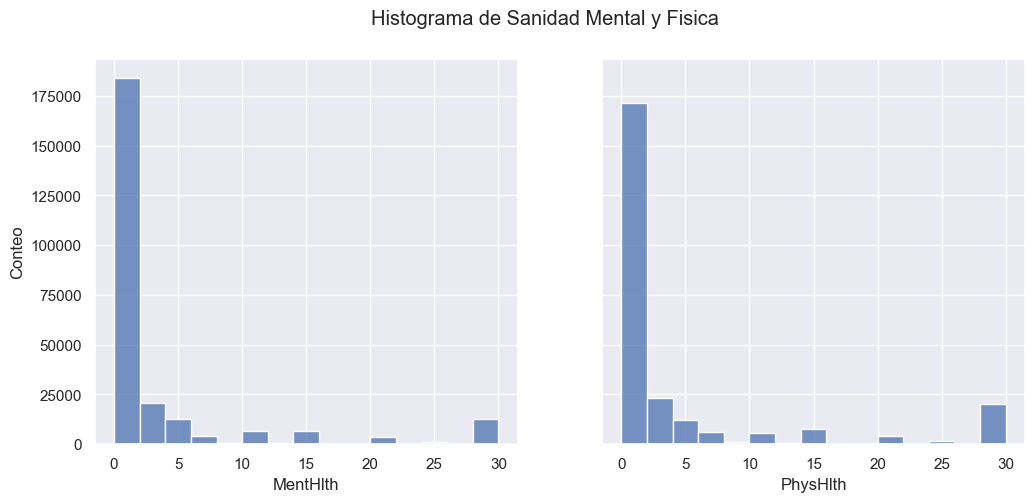

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12,5),sharey=True)
sns.histplot(data=df1, x='MentHlth',ax=axs[0], binwidth=2)
sns.histplot(data=df1, x='PhysHlth',ax=axs[1], binwidth=2)

axs[0].set_ylabel('Conteo')
fig.suptitle('Histograma de Sanidad Mental y Fisica')

plt.show()

**Decisión** Dado que la mayoría de los individuos parecen estar sanos (con pocos reportes de días con problemas de salud), estas columnas pueden no aportar suficiente información relevante para la predicción del diagnóstico de diabetes que es una enfermedad cronica.

In [16]:
# Usar una máscara booleana para eliminar valores atípicos
mask = True
for column, lim in lims.items():
    if column == 'GenHlth': continue
    mask &= ((df1[column] <= lim[0]) & (df1[column] >= lim[1]))
df2 = df1[mask].copy()

In [17]:
df2.drop(columns=['PhysHlth','MentHlth'], inplace=True)

Para df1 se eliminan los valores atípicos y se crea df2.

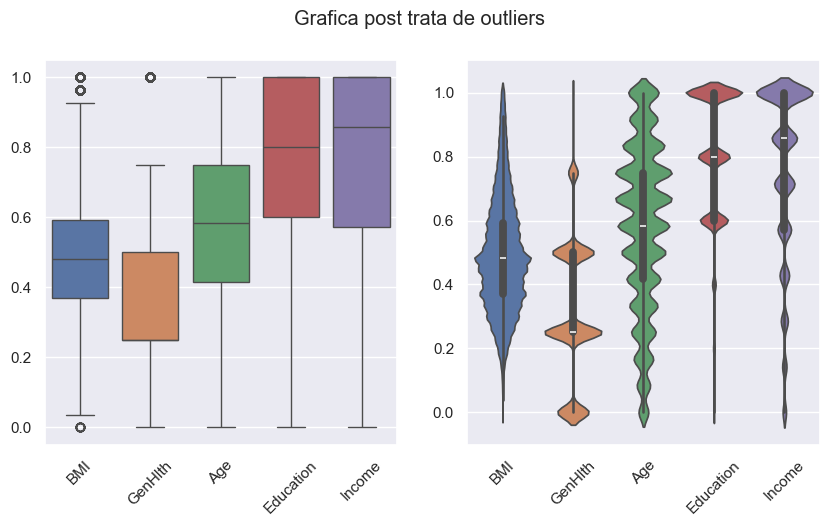

In [18]:
# Crear un boxplot para visualizar la distribución de todas las variables numéricas y detectar posibles valores atípicos
fig, axs= plt.subplots(1, 2, figsize=(10,5))
# seleccionar columnas numéricas
num_columns = df2.select_dtypes(include=['number'])

# normalizar los valores usando escalado Min-Max
scaler = MinMaxScaler()
normalized_data2 = scaler.fit_transform(num_columns)

# Crear un dataframe con los datos normalizados
df_normalized2 = pd.DataFrame(normalized_data2, columns=num_columns.columns)
sns.boxplot(data= df_normalized2, ax=axs[0])
sns.violinplot(data= df_normalized2, ax=axs[1])

axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)

fig.suptitle('Grafica post trata de outliers')
plt.show()

Se vuelven a crear boxplot y violin plot para comparar la distribución de varias variables después del tratamiento de outliers. Las variables presentadas son BMI (Índice de Masa Corporal), GenHlth (Salud General), Age (Edad), Education (Educación) y Income (Ingresos).

`Boxplot.`

**BMI:** La mediana se encuentra alrededor de 0.4, y el rango intercuartílico (IQR) muestra una distribución concentrada en la mitad inferior del rango, con algunos outliers por encima de 0.8.

**GenHlth:** Tiene una mediana alrededor de 0.5, y una dispersión notable en la mitad inferior. Se observan algunos outliers por encima de 1.0, lo que indica individuos con una salud general más alta que el promedio.

**Age:** La distribución es bastante uniforme, con la mediana cerca de 0.6. No se observan outliers, y el rango es más amplio, cubriendo gran parte del espectro.

**Education:** La mediana está en 0.8, lo que indica que la mayoría de los datos están en el rango superior de educación. La caja es más estrecha, mostrando una menor variabilidad, y no hay outliers notables.

**Income:** Similar a Education, con una mediana cerca de 0.9 y una caja aún más compacta, sugiriendo una concentración de ingresos altos. No hay outliers visibles.



`Violin Plot.`

**BMI:** La distribución tiene forma de campana, con mayor densidad en valores entre 0.3 y 0.5, sugiriendo que la mayoría de las personas tienen un BMI en este rango.

**GenHlth:** Presenta una distribución algo bimodal con una mayor concentración alrededor de 0.5 y otra ligera concentración alrededor de 0.8, lo cual sugiere que la salud general varía, con subgrupos en niveles específicos.

**Age:** Tiene una distribución simétrica y alargada, indicando una amplia variedad en la edad de los individuos, con un pico de densidad alrededor de 0.6.

**Education:** La distribución es mayormente uniforme, con un pico alrededor de 0.8, indicando una alta concentración en niveles educativos más altos.

**Income:** Muy concentrado en el extremo superior (cerca de 1.0), lo que sugiere que la mayoría de los individuos tienen ingresos elevados, reflejando una menor diversidad en esta variable.


Los gráficos muestran que, después del tratamiento de outliers, variables como Education e Income se encuentran concentradas en valores altos (0.8-1.0), mientras que BMI y GenHlth muestran más variabilidad y presencia de valores atípicos. La variable Age tiene una distribución más amplia, cubriendo la mayoría del rango sin valores atípicos. Esto da una idea clara de cómo se distribuyen las características en la población después de limpiar los valores extremos.

### 4 Desarrollo de Modelos

#### Metodología para creación y testeo de modelos de redes neuronales:

- Debido a que el dataset se encuentra desbalanceado, se utilziará SMOTE para balancearlo, para luego dividir el dataset en un conjunto de entrenamiento y otro de testeo. Sobre el dataset dividido, se normalizarán las variables predictoras con un StandardScaler.

- Se utilizará crearán y testearán cuatro modelos de redes neuronales secuenciales y se probará el desempeño de estos con una capa de entrada, dos ocultas de 16 y 8 unidades y una capa de salida de una unidad. Las configuraciones de los modelos variarán según tamaño de batch con 16 y 8, y funciones de activación relu y leaky_relu. Los modelos serán entrenados con 6 épocas y un learning rate de 0.01. Cabe destacar que, para hacer comparables los modelos, se utilizará la misma semilla para la inicialización de los pesos en la creación de los modelos.

- Se evaluará el desempeño del modelo con la métrica de f1_score debido a el desbalance presente en el datset y se compararán los resultados obtenidos de los distintos modelos.

#### 4.1 Preparacion de los Datos

In [19]:
# Definir las características (X) y el objetivo (y) desde el dataset
X = df2.drop(['Diabetes_binary'], axis=1)  
y = df2['Diabetes_binary']

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Mostrar las formas de los conjuntos de datos resultantes
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)


Tamaño de X_train: (130760, 19)
Tamaño de X_test: (56041, 19)
Tamaño de y_train: (130760,)
Tamaño de y_test: (56041,)


In [20]:
unique, counts = np.unique(y_train, return_counts=True)
print("Distribución de clases en y_train:", dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print("Distribución de clases en y_test:", dict(zip(unique, counts)))


Distribución de clases en y_train: {np.False_: np.int64(116460), np.True_: np.int64(14300)}
Distribución de clases en y_test: {np.False_: np.int64(49977), np.True_: np.int64(6064)}


In [21]:
# Aplicar SMOTE al conjunto de entrenamiento para balancear las clases
smote = SMOTE(random_state=123)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar la distribución de clases después de SMOTE
unique, counts = np.unique(y_train_balanced, return_counts=True)
print("Distribución después de SMOTE:", dict(zip(unique, counts)))

# Normalizar las características (opcional, pero recomendado para Redes Neuronales)
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)


Distribución después de SMOTE: {np.False_: np.int64(116460), np.True_: np.int64(116460)}


#### 4.2 Redes Neuronales

In [ ]:
def set_seed(seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)

    
def create_and_train_model(hidden_units, epochs, batch_size, activation, learning_rate, X_train, y_train, X_test, y_test):
    set_seed(123)
    model = models.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(16, activation=activation))
    model.add(layers.Dense(8, activation=activation))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['f1_score'])
            #   metrics=['f1'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    # Evaluar el modelo
    train_acc = model.evaluate(X_train, y_train, batch_size=32)[1]
    test_acc = model.evaluate(X_test, y_test, batch_size=32)[1]
    print('Training f1_score: %s' % train_acc)
    print('Testing f1_score: %s' % test_acc)
    losses = history.history['loss']
    plt.plot(range(len(losses)), losses, 'r')
    plt.title("Curva de pérdida")
    plt.xlabel("Épocas")
    plt.ylabel("Pérdida")
    plt.show()
    # confusion matrix
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5)
    cm = confusion_matrix(y_test, y_pred)
    # graph cm
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

In [46]:
hidden_units = 16     # Número de neuronas en la capa oculta
learning_rate = 0.01  # Tasa de aprendizaje
epochs = 6            # Número de épocas

##### 4.2.1 Modelo con función de <code>activación ReLU </code> y <code>batch_size = 16</code>

Se observa una disminución constante en la curva de pérdida, con una estabilización cerca de la época 4, lo que indica que el modelo está aprendiendo de manera efectiva. El accuracy también aumenta con cada época, lo que sugiere que el modelo está mejorando su capacidad para predecir el diagnóstico de diabetes.

Por otro lado, en la matriz de confusión se puede observar que el error en la predicción es porcentualmente similar para ambas clases.

Epoch 1/6
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - f1_score: 0.6672 - loss: 0.5269
Epoch 2/6
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - f1_score: 0.6672 - loss: 0.5171
Epoch 3/6
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - f1_score: 0.6672 - loss: 0.5162
Epoch 4/6
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - f1_score: 0.6672 - loss: 0.5158
Epoch 5/6
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - f1_score: 0.6672 - loss: 0.5150
Epoch 6/6
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 14s 990us/step - f1_score: 0.6672 - loss: 0.5149
7279/7279 ━━━━━━━━━━━━━━━━━━━━ 6s 782us/step - f1_score: 0.3305 - loss: 0.4891
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step - f1_score: 0.1962 - loss: 0.4858
Training f1_score: 0.6666666269302368
Testing f1_score: 0.19528214633464813


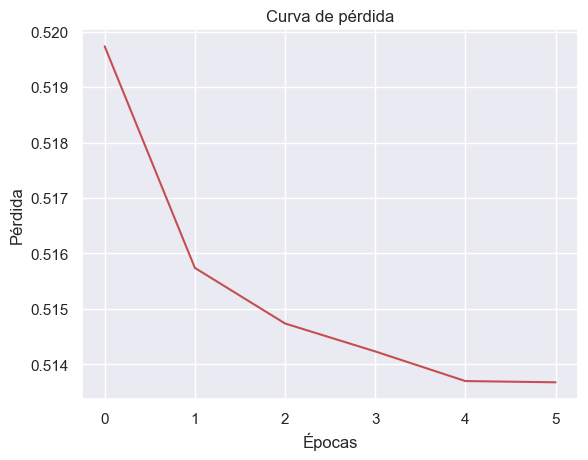

1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step


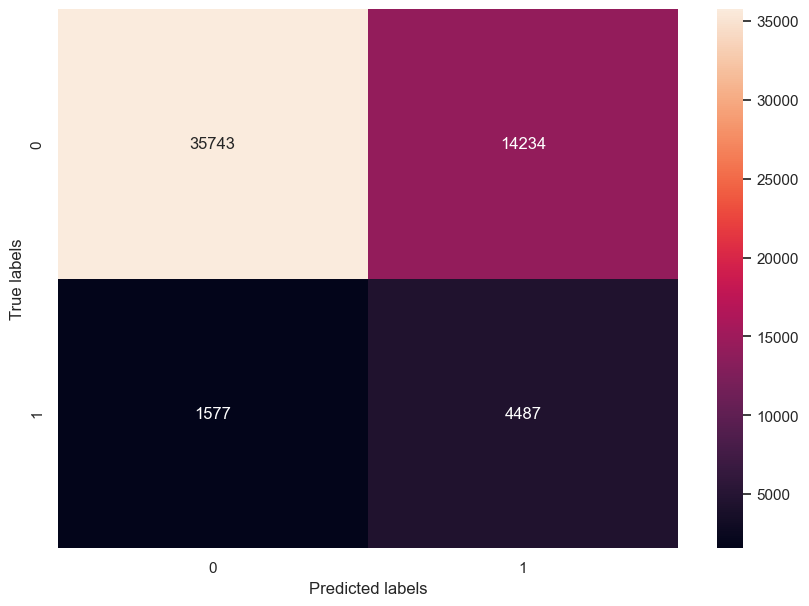

In [47]:
# Hiperparametros
activation = 'relu'   # Función de activación para la capa oculta
batch_size = 16       # Tamaño del lote
create_and_train_model(hidden_units, epochs, batch_size, activation, learning_rate, X_train_balanced, y_train_balanced, X_test, y_test)

##### 4.2.2 Modelo con función de <code>activación ReLU</code> y <code>batch_size = 8</code>

Se observa una disminución constante en la curva de pérdida, con una estabilización cerca de la época 4, lo que indica que el modelo está aprendiendo de manera efectiva. El accuracy también aumenta con cada época, lo que sugiere que el modelo está mejorando su capacidad para predecir el diagnóstico de diabetes.

Por otro lado, en la matriz de confusión se puede observar que el error en la predicción es porcentualmente similar para ambas clases.

Epoch 1/6


c:\Magister\3er trimestre\MLA\Tarea4MachineLearning\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29115/29115 ━━━━━━━━━━━━━━━━━━━━ 30s 983us/step - f1_score: 0.6672 - loss: 0.5286
Epoch 2/6
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - f1_score: 0.6672 - loss: 0.5212
Epoch 3/6
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - f1_score: 0.6672 - loss: 0.5206
Epoch 4/6
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - f1_score: 0.6672 - loss: 0.5191
Epoch 5/6
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - f1_score: 0.6672 - loss: 0.5187
Epoch 6/6
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - f1_score: 0.6672 - loss: 0.5182
7279/7279 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - f1_score: 0.3300 - loss: 0.5032
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - f1_score: 0.1962 - loss: 0.5034
Training f1_score: 0.6666666269302368
Testing f1_score: 0.19528214633464813


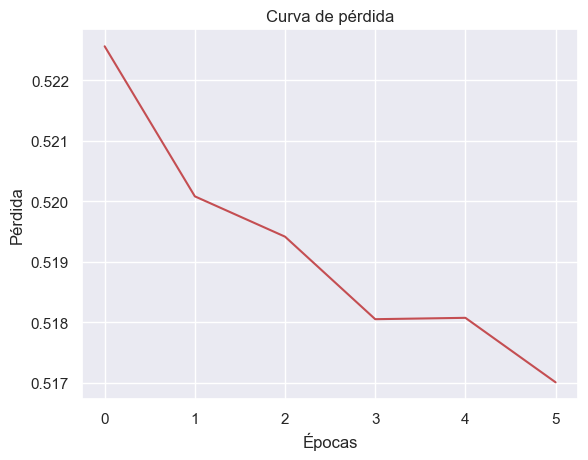

1752/1752 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step


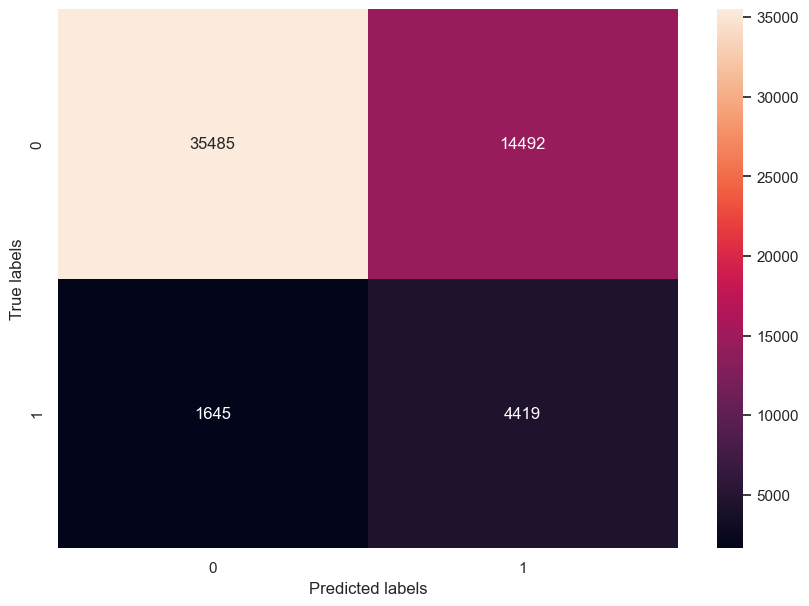

In [48]:
# Hiperparametros
activation = 'relu'   # Función de activación para la capa oculta
batch_size = 8       # Tamaño del lote
create_and_train_model(hidden_units, epochs, batch_size, activation, learning_rate, X_train_balanced, y_train_balanced, X_test, y_test)

##### 4.2.3 Modelos con función de <code>activación leaky_relu</code> y <code>batch_size = 16</code>

Se observa una disminución constante en la curva de pérdida, con una estabilización cerca de la época 2, lo que indica que el modelo está aprendiendo de manera efectiva. El accuracy también aumenta con cada época, lo que sugiere que el modelo está mejorando su capacidad para predecir el diagnóstico de diabetes.

Por otro lado, en la matriz de confusión se puede observar que el error en la predicción es porcentualmente similar para ambas clases.

Epoch 1/6


c:\Magister\3er trimestre\MLA\Tarea4MachineLearning\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14558/14558 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - f1_score: 0.6672 - loss: 0.5269
Epoch 2/6
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - f1_score: 0.6672 - loss: 0.5173
Epoch 3/6
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - f1_score: 0.6672 - loss: 0.5155
Epoch 4/6
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - f1_score: 0.6672 - loss: 0.5149
Epoch 5/6
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - f1_score: 0.6672 - loss: 0.5146
Epoch 6/6
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - f1_score: 0.6672 - loss: 0.5143
7279/7279 ━━━━━━━━━━━━━━━━━━━━ 7s 973us/step - f1_score: 0.3307 - loss: 0.4869
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - f1_score: 0.1962 - loss: 0.4828
Training f1_score: 0.6666666269302368
Testing f1_score: 0.19528214633464813


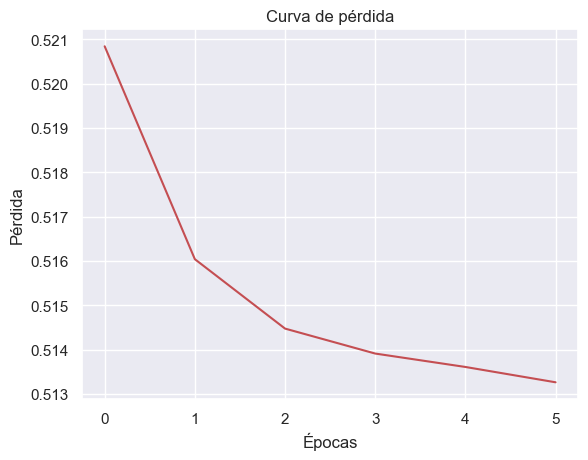

1752/1752 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step


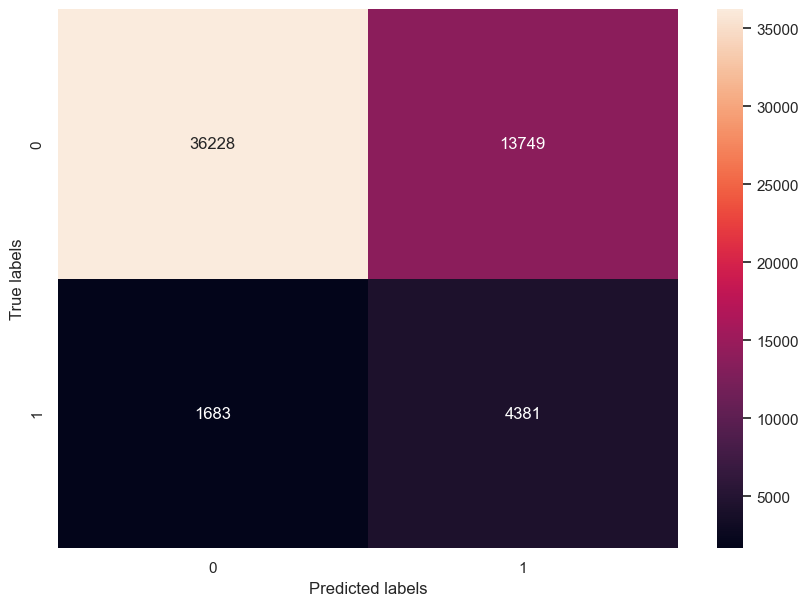

In [49]:

# Hiperparametros
activation = activations.leaky_relu   # Función de activación para la capa oculta
batch_size = 16       # Tamaño del lote
create_and_train_model(hidden_units, epochs, batch_size, activation, learning_rate, X_train_balanced, y_train_balanced, X_test, y_test)

##### 4.2.4 Modelos con función de <code>activación leaky_relu</code> y <code>batch_size = 8</code>

Se observa una disminución constante en la curva de pérdida, con una estabilización cerca de la época 2, lo que indica que el modelo está aprendiendo de manera efectiva. El accuracy también aumenta con cada época, lo que sugiere que el modelo está mejorando su capacidad para predecir el diagnóstico de diabetes.

Por otro lado, en la matriz de confusión se puede observar que el error en la predicción es porcentualmente similar para ambas clases.

Epoch 1/6


c:\Magister\3er trimestre\MLA\Tarea4MachineLearning\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29115/29115 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - f1_score: 0.6672 - loss: 0.5278
Epoch 2/6
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - f1_score: 0.6672 - loss: 0.5191
Epoch 3/6
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - f1_score: 0.6672 - loss: 0.5185
Epoch 4/6
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - f1_score: 0.6672 - loss: 0.5182
Epoch 5/6
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - f1_score: 0.6672 - loss: 0.5181
Epoch 6/6
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - f1_score: 0.6672 - loss: 0.5179
7279/7279 ━━━━━━━━━━━━━━━━━━━━ 7s 996us/step - f1_score: 0.3303 - loss: 0.4930
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - f1_score: 0.1962 - loss: 0.4894
Training f1_score: 0.6666666269302368
Testing f1_score: 0.19528214633464813


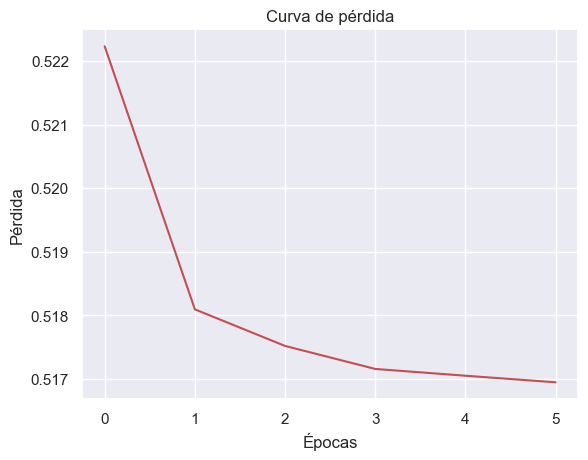

1752/1752 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step


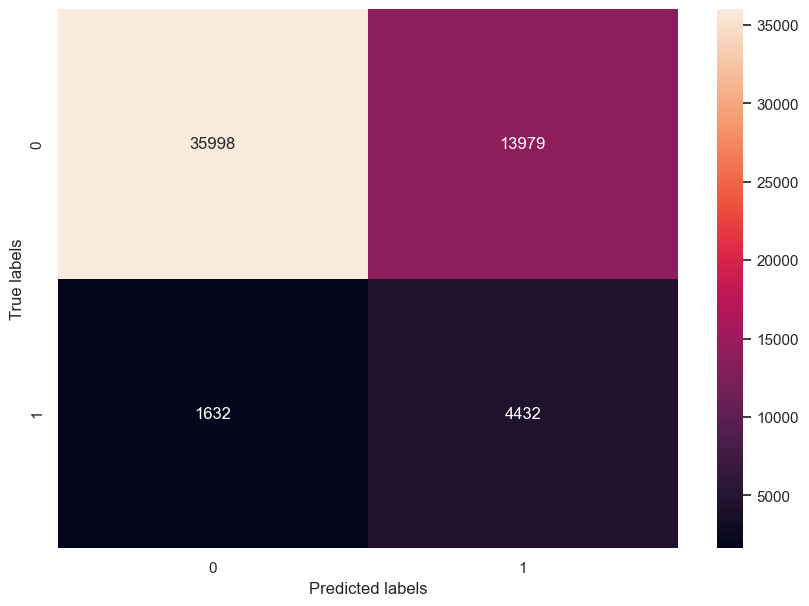

In [50]:
# Hiperparametros
activation = activations.leaky_relu   # Función de activación para la capa oculta
batch_size = 8       # Tamaño del lote
create_and_train_model(hidden_units, epochs, batch_size, activation, learning_rate, X_train_balanced, y_train_balanced, X_test, y_test)

### 5 Interpretacion de Resultados

<div style="text-align: justify;">

Para los modelos entrenados con ReLU, se observa que la curva de pérdida muestra una disminución constante a medida que avanzan las épocas, lo cual indica que el modelo está aprendiendo y optimizando su desempeño en el conjunto de entrenamiento. Sin embargo, se nota que, a partir de la cuarta época, las pérdidas comienzan a estabilizarse.

Por otro lado, para los modelos entrenados con Leaky ReLU, la curva de pérdida también muestra una disminución constante, pero esta es más pronunciada en comparación con los modelos entrenados con ReLU. Esto sugiere que la función de activación Leaky ReLU puede estar favoreciendo un aprendizaje más rápido y eficiente. Además, se observa que las pérdidas comienzan a estabilizarse a partir de la segunda época.  

Los informes de clasificación muestran métricas que indican un rendimiento desigual entre las clases <code>False</code> y <code>True</code>, lo que refleja un problema de desbalanceo en los datos. Aunque se intentó abordar este problema mediante técnicas de sobremuestreo de la clase minoritaria, como SMOTE, los resultados muestran que estas estrategias no fueron suficientes para lograr una clasificación balanceada. A pesar de esto, los modelos mostraron un comportamiento aceptable. </div>

### 6. Conclusiones y Recomendaciones

<div style="text-align: justify;">
Los resultados en la clasificación indican que los modelos de predicción enfrentan un <code>desbalance significativo</code> entre las clases <code>False</code> y <code>True</code>, lo que sugiere que las métricas de rendimiento no reflejan adecuadamente la capacidad del modelo para clasificar ambas clases. Aunque se realizaron intentos de ajustar los modelos para abordar este problema, los resultados muestran que estas medidas no fueron suficientes para lograr un desempeño equilibrado.
</div>

1. **Rendimiento de las funciones de activación**:  
   <div style="text-align: justify;">
   Los modelos entrenados con la función de activación <code>ReLU</code> mostraron una disminución constante en la curva de pérdida durante las primeras épocas, lo que indica un aprendizaje progresivo. Sin embargo, la estabilización de las pérdidas a partir de la cuarta época sugiere que el modelo alcanzó un punto de saturación, lo cual limita su capacidad de mejorar en el conjunto de entrenamiento. Por otro lado, los modelos entrenados con <code>Leaky ReLU</code> mostraron una disminución de la pérdida más pronunciada y un comportamiento de estabilización más temprano (alrededor de la segunda época), lo que indica un aprendizaje más rápido y eficiente.
   </div>
   <br>

2. **Estrategias para mejorar el modelo**:  
   <div style="text-align: justify;">
   Aunque los modelos mostraron un comportamiento aceptable, el desbalanceo de clases sigue siendo un desafío importante. Para mejorar el desempeño, se recomienda el uso de arquitecturas de redes neuronales más complejas o la aplicación de métodos de regularización que ayuden a reducir el sobreajuste de la clase sobrerepresentada. Además, sería conveniente considerar la recopilación de más datos (de otros datasets) o la aplicación de otras técnicas de <code>data augmentation</code> para mejorar la representación de la clase minoritaria.
   </div>  
   <br>

3. **Recomendaciones futuras**:  
   <div style="text-align: justify;">
   Dado que el modelo aún no logra un buen balance de clasificación, se recomienda realizar más experimentos con otras funciones de activación y explorar diferentes configuraciones de la arquitectura de los nodos. Además, es fundamental seguir evaluando técnicas para el manejo del desbalanceo de clases, como el uso de estrategias de <code>downsampling</code> o simplemente buscar modelos específicos para el aprendizaje en clases desbalanceadas.
   </div>
